In [3]:
import pandas as pd 
import urllib.request
urllib.request.urlretrieve("https://raw.githubusercontent.com/franciscadias/data/master/abcnews-date-text.csv", filename="abcnews-date-text.csv")
data = pd.read_csv('abcnews-date-text.csv', error_bad_lines=False)

print(len(data))

1082168


In [4]:
print(data.head(5))

   publish_date                                      headline_text
0      20030219  aba decides against community broadcasting lic...
1      20030219     act fire witnesses must be aware of defamation
2      20030219     a g calls for infrastructure protection summit
3      20030219           air nz staff in aust strike for pay rise
4      20030219      air nz strike to affect australian travellers


In [5]:
text = data[['headline_text']]

import nltk
nltk.download('punkt')
# word tokenization
text['headline_text'] = text.apply(lambda row: nltk.word_tokenize(row['headline_text']), axis=1)

# stop words removal
from nltk.corpus import stopwords
nltk.download('stopwords')

stop = stopwords.words('english')
text['headline_text'] = text['headline_text'].apply(lambda x: [word for word in x if word not in (stop)])

print(text.head(5))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
                                       headline_text
0   [aba, decides, community, broadcasting, licence]
1    [act, fire, witnesses, must, aware, defamation]
2     [g, calls, infrastructure, protection, summit]
3          [air, nz, staff, aust, strike, pay, rise]
4  [air, nz, strike, affect, australian, travellers]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [6]:
# Lemmatization

from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

text['headline_text'] = text['headline_text'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='v') for word in x])

tokenized_doc = text['headline_text'].apply(lambda x: [word for word in x if len(word) > 3]) 

print(tokenized_doc[:5])


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0       [decide, community, broadcast, licence]
1      [fire, witness, must, aware, defamation]
2    [call, infrastructure, protection, summit]
3                   [staff, aust, strike, rise]
4      [strike, affect, australian, travellers]
Name: headline_text, dtype: object


In [12]:
# 역토큰화 (토큰화 작업을 되돌림)
detokenized_doc = []
for i in range(len(text)):
    t = ' '.join(tokenized_doc[i])
    detokenized_doc.append(t)

text['headline_text'] = detokenized_doc # 다시 text['headline_text']에 재저장

from sklearn.feature_extraction.text import TfidfVectorizer
# 상위 1,000개의 단어를 보존
vectorizer = TfidfVectorizer(stop_words='english', max_features= 1000)  
# (과제)max_features  =3000 , 5000
X = vectorizer.fit_transform(text['headline_text']) 
X.shape # TF-IDF 행렬의 크기 확인 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


(1082168, 1000)

In [52]:
# 역토큰화 (토큰화 작업을 되돌림)
detokenized_doc = []
for i in range(len(text)):
    t = ' '.join(tokenized_doc[i])
    detokenized_doc.append(t)

text['headline_text'] = detokenized_doc # 다시 text['headline_text']에 재저장

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer2 = TfidfVectorizer(stop_words='english', max_features= 3000)  

Y = vectorizer2.fit_transform(text['headline_text']) 
Y.shape # TF-IDF 행렬의 크기 확인 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


(1082168, 3000)

In [57]:
# 역토큰화 (토큰화 작업을 되돌림)
detokenized_doc = []
for i in range(len(text)):
    t = ' '.join(tokenized_doc[i])
    detokenized_doc.append(t)

text['headline_text'] = detokenized_doc # 다시 text['headline_text']에 재저장

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer3 = TfidfVectorizer(stop_words='english', max_features= 5000)  

Z = vectorizer3.fit_transform(text['headline_text']) 
Z.shape # TF-IDF 행렬의 크기 확인 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


(1082168, 5000)

In [13]:
from sklearn.decomposition import LatentDirichletAllocation

lda_model=LatentDirichletAllocation(n_components=10,learning_method='online',random_state=777,max_iter=1) 
lda_top=lda_model.fit_transform(X)

terms = vectorizer.get_feature_names() # 단어 집합. 1,000개의 단어가 저장됨. 

def get_topics(components, feature_names, n=10):   # (과제)n=10
	for idx, topic in enumerate(components):
		print("Topic %d:" % (idx+1), [(feature_names[i], topic[i].round(2))
for i in topic.argsort()[:-n - 1:-1]])

get_topics(lda_model.components_,terms)


Topic 1: [('government', 8725.19), ('sydney', 8393.29), ('queensland', 7720.12), ('change', 5874.27), ('home', 5674.38), ('year', 5586.42), ('live', 5488.62), ('arrest', 3934.91), ('final', 3652.78), ('bank', 3270.15)]
Topic 2: [('australia', 13691.08), ('australian', 11088.95), ('melbourne', 7528.43), ('world', 6707.7), ('south', 6677.03), ('canberra', 6112.23), ('country', 5251.55), ('accuse', 4070.65), ('lose', 3633.43), ('dead', 3503.84)]
Topic 3: [('death', 5935.06), ('interview', 5924.98), ('kill', 5851.6), ('jail', 4632.85), ('life', 4275.27), ('health', 4267.08), ('minister', 3973.22), ('leave', 3849.71), ('news', 3601.53), ('lead', 3545.11)]
Topic 4: [('house', 6113.49), ('2016', 5488.19), ('state', 4923.41), ('brisbane', 4857.21), ('tasmania', 4610.97), ('miss', 4546.98), ('hospital', 4332.34), ('family', 3965.05), ('fight', 3872.94), ('concern', 3604.71)]
Topic 5: [('court', 7542.74), ('attack', 6959.64), ('open', 5663.0), ('face', 5193.63), ('warn', 5115.01), ('years', 5080

In [ ]:
lda_model_Y=LatentDirichletAllocation(n_components=10,learning_method='online',random_state=777,max_iter=1) 
lda_top=lda_model_Y.fit_transform(Y)

terms = vectorizer2.get_feature_names() # 단어 집합. 3,000개의 단어가 저장됨. 
def get_topics(components, feature_names, n=10):   # (과제)n=10
	for idx, topic in enumerate(components):
		print("Topic %d:" % (idx+1), [(feature_names[i], topic[i].round(2)) 
for i in topic.argsort()[:-n - 1:-1]])

get_topics(lda_model_Y.components_,terms)


Topic 1: [('government', 7189.41), ('rural', 4815.37), ('home', 4601.0), ('hospital', 3603.5), ('fund', 3064.79), ('health', 3050.71), ('fall', 2964.17), ('concern', 2932.37), ('budget', 2931.54), ('work', 2880.99)]
Topic 2: [('australia', 10776.06), ('adelaide', 5572.36), ('make', 4408.25), ('tasmanian', 3993.18), ('tasmania', 3808.37), ('league', 3275.91), ('trial', 2913.95), ('dead', 2870.07), ('high', 2859.74), ('return', 2711.14)]
Topic 3: [('trump', 9074.61), ('house', 4980.23), ('test', 3981.1), ('national', 3343.49), ('family', 3193.38), ('child', 3181.4), ('water', 3007.75), ('need', 2914.07), ('lead', 2775.65), ('help', 2727.23)]
Topic 4: [('court', 5986.55), ('change', 4761.32), ('year', 4626.85), ('face', 4117.53), ('donald', 3721.05), ('leave', 3104.22), ('service', 3030.97), ('children', 2907.64), ('drum', 2783.4), ('abuse', 2646.5)]
Topic 5: [('attack', 5430.09), ('perth', 5236.15), ('open', 4393.39), ('indigenous', 3424.3), ('2015', 3201.47), ('lose', 2860.87), ('farm',

In [ ]:
lda_model=LatentDirichletAllocation(n_components=10,learning_method='online',random_state=777,max_iter=1) 
lda_top=lda_model.fit_transform(Z)

terms = vectorizer3.get_feature_names() # 단어 집합. 5,000개의 단어가 저장됨. 

def get_topics(components, feature_names, n=10):   # (과제)n=10
	for idx, topic in enumerate(components):
		print("Topic %d:" % (idx+1), [(feature_names[i], topic[i].round(2))
for i in topic.argsort()[:-n - 1:-1]])

get_topics(lda_model.components_,terms)

Topic 1: [('government', 6740.89), ('attack', 5055.92), ('home', 4300.02), ('miss', 3392.94), ('labor', 3080.0), ('minister', 2898.59), ('budget', 2775.08), ('news', 2749.02), ('meet', 2731.32), ('victoria', 2625.68)]
Topic 2: [('sydney', 6259.51), ('canberra', 4651.42), ('change', 4448.86), ('market', 4437.78), ('year', 4296.24), ('test', 3723.39), ('share', 3116.5), ('flood', 2665.5), ('guilty', 2554.7), ('week', 2124.29)]
Topic 3: [('police', 6239.97), ('charge', 5411.59), ('court', 4459.22), ('report', 4192.1), ('murder', 4053.94), ('years', 3841.1), ('face', 3816.45), ('drug', 3264.53), ('women', 3216.12), ('life', 3148.45)]
Topic 4: [('trump', 8500.1), ('australian', 8121.97), ('election', 5714.34), ('adelaide', 5189.51), ('make', 3993.77), ('interview', 3815.44), ('help', 3780.78), ('jail', 3442.04), ('shoot', 3399.82), ('victorian', 2468.07)]
Topic 5: [('south', 5141.55), ('2016', 4280.73), ('live', 4140.6), ('crash', 4100.22), ('warn', 3808.13), ('brisbane', 3747.37), ('death'

In [35]:
from sklearn.manifold import TSNE
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

In [29]:
tsne = TSNE(n_components=2, n_iter=10000, verbose=1)
Z = tsne.fit_transform(X.T)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.010s...
[t-SNE] Computed neighbors for 1000 samples in 0.371s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 4.222419
[t-SNE] KL divergence after 250 iterations with early exaggeration: 152.620392
[t-SNE] KL divergence after 1150 iterations: 2.468912


In [30]:
print(Z[0:5])
print('Top words: ', len(Z))

[[ -1.8148546  -4.83768  ]
 [ -1.5498776  -4.9258566]
 [ -1.0407622  -5.263114 ]
 [ -6.3660207  -5.152963 ]
 [  5.45876   -16.781092 ]]
Top words:  1000


In [37]:
tfidf_dict = vectorizer.get_feature_names()
print(tfidf_dict)

['2013', '2014', '2015', '2016', 'abbott', 'aboriginal', 'abuse', 'accc', 'accept', 'access', 'accident', 'accuse', 'action', 'address', 'adelaide', 'admit', 'affect', 'afghan', 'afghanistan', 'africa', 'agree', 'agreement', 'ahead', 'airport', 'alcohol', 'alert', 'alice', 'allegations', 'allege', 'allow', 'ambulance', 'amid', 'andrew', 'anger', 'angry', 'animal', 'announce', 'answer', 'anti', 'anzac', 'apologise', 'appeal', 'appoint', 'approval', 'approve', 'april', 'army', 'arrest', 'arrive', 'asbestos', 'asia', 'asian', 'assault', 'asylum', 'attack', 'attempt', 'august', 'aussie', 'aussies', 'aust', 'australia', 'australian', 'australians', 'australias', 'authorities', 'avoid', 'await', 'award', 'away', 'baby', 'baghdad', 'bail', 'bali', 'bangladesh', 'bank', 'base', 'bash', 'battle', 'beach', 'beat', 'beattie', 'beef', 'begin', 'bendigo', 'benefit', 'best', 'better', 'bike', 'bikie', 'bird', 'bite', 'black', 'blame', 'blast', 'blaze', 'block', 'blow', 'blue', 'board', 'boat', 'body

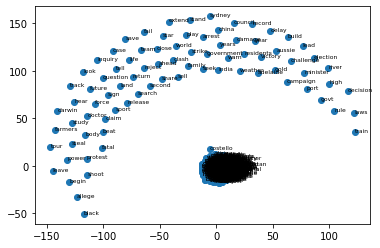

In [47]:
fontprop = fm.FontProperties(size=6)
plt.scatter(Z[:,0], Z[:,1])
for i in range(len(tfidf_dict)):
    plt.annotate(s=tfidf_dict[i].encode("utf8").decode("utf8"), xy=(Z[i,0], Z[i,1]),fontProperties =fontprop)

plt.draw()

In [55]:
tfidf_dict1 = vectorizer2.get_feature_names()
print(tfidf_dict1)
tsne = TSNE(n_components=2, n_iter=10000, verbose=1)
Z = tsne.fit_transform(Y.T)

['1000', '100m', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', 'abalone', 'abandon', 'abattoir', 'abbott', 'abduction', 'aboriginal', 'abortion', 'abuse', 'academic', 'accc', 'accept', 'access', 'accident', 'accidents', 'accommodation', 'account', 'accuse', 'aceh', 'acquit', 'action', 'activist', 'activists', 'actor', 'actu', 'adam', 'address', 'adelaide', 'adjourn', 'administration', 'admit', 'adopt', 'advance', 'advantage', 'advertise', 'advice', 'adviser', 'advocate', 'aerial', 'affair', 'affect', 'affordable', 'afghan', 'afghanistan', 'africa', 'african', 'agencies', 'agency', 'agenda', 'agent', 'agforce', 'agree', 'agreement', 'agricultural', 'agriculture', 'ahead', 'aircraft', 'airline', 'airlines', 'airport', 'alan', 'alarm', 'albany', 'albury', 'alcohol', 'alert', 'alex', 'algae', 'alice', 'alive', 'allegations', 'allege', 'allegedly', 'alliance', 'allow', 'alternative', 'ambassador', 'ambulance', 'america', 'american', 'amid', 'amnesty', 'analysis', 'analyst'

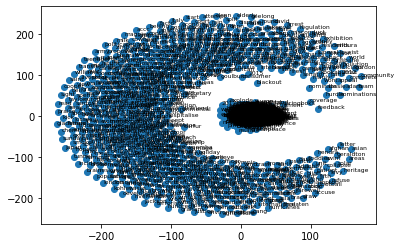

In [56]:
fontprop = fm.FontProperties(size=6)
plt.scatter(Z[:,0], Z[:,1])
for i in range(len(tfidf_dict1)):
    plt.annotate(s=tfidf_dict1[i].encode("utf8").decode("utf8"), xy=(Z[i,0], Z[i,1]),fontProperties =fontprop)

plt.draw()

In [59]:
tfidf_dict3 = vectorizer3.get_feature_names()
print(tfidf_dict3)
tsne = TSNE(n_components=2, n_iter=10000, verbose=1)
Z = tsne.fit_transform(Z.T)

['1000', '10000', '100000', '100k', '100m', '12yo', '14yo', '2000', '2004', '2005', '2006', '2007', '2008', '2009', '200m', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2020', '36ers', '400m', '5000', 'aaron', 'abalone', 'abandon', 'abattoir', 'abbas', 'abbot', 'abbott', 'abbotts', 'abcs', 'abduct', 'abduction', 'abetz', 'able', 'ablett', 'abolish', 'aboriginal', 'aborigines', 'abortion', 'absence', 'abuse', 'academic', 'academy', 'accc', 'accept', 'access', 'accident', 'accidental', 'accidents', 'accommodation', 'accord', 'account', 'accusations', 'accuse', 'aceh', 'acid', 'acknowledge', 'acquit', 'action', 'activist', 'activists', 'activity', 'actor', 'actress', 'actu', 'adam', 'adams', 'adani', 'addict', 'addiction', 'address', 'adelaide', 'adelaides', 'adjourn', 'administration', 'administrator', 'administrators', 'admit', 'adopt', 'adoption', 'adrian', 'adult', 'advance', 'advantage', 'adventure', 'advertise', 'advice', 'advise', 'adviser', 'advisory', 

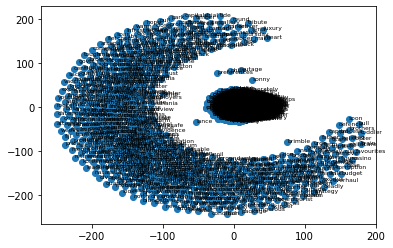

In [60]:
fontprop = fm.FontProperties(size=6)
plt.scatter(Z[:,0], Z[:,1])
for i in range(len(tfidf_dict3)):
    plt.annotate(s=tfidf_dict3[i].encode("utf8").decode("utf8"), xy=(Z[i,0], Z[i,1]),fontProperties =fontprop)

plt.draw()